# Analysis of face recognition accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

## Depending on image size

In [2]:
 # Store the path to the images for each subject.
images_subjects = []
for directory in glob.glob("CroppedYale/*"):
      images_subjects.append(glob.glob(directory+"/*.pgm"))
        
im = images_subjects[3][1]
a = cv2.imread(im)
a_resized = cv2.resize(a,(10,12),interpolation = cv2.INTER_AREA)

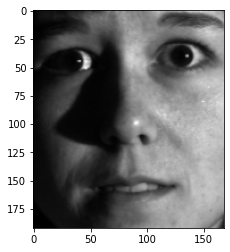

In [3]:
plt.imshow(a)

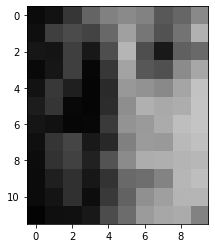

In [4]:
plt.imshow(a_resized)

In [5]:
data = pd.read_csv('differentSizes.txt')
data

,width,height,running_time,accuracy
0,8,7,1.472822,83.258729
1,9,8,1.501846,84.848485
2,12,10,1.998369,90.925267
3,16,14,9.099282,93.122172
4,20,15,13.782611,93.766938


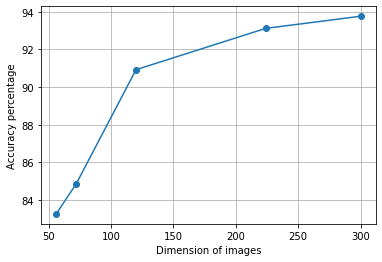

In [6]:
plt.plot(data["width"]*data["height"],data["accuracy"],'o-')
plt.xlabel("Dimension of images")
plt.ylabel("Accuracy percentage")
plt.grid()


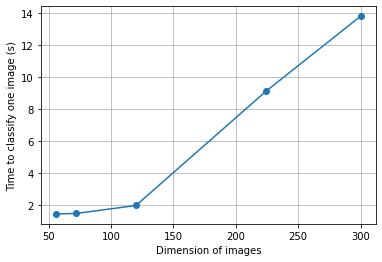

In [7]:
plt.plot(data["width"]*data["height"],data["running_time"],'o-')
plt.xlabel("Dimension of images")
plt.ylabel("Time to classify one image (s)")
plt.grid()

## Depending on training size

In [8]:
data = pd.read_csv('differentImagesPerClass.txt')
data

,training_size,running_time,accuracy
0,5,0.138300,59.122807
1,9,0.195013,77.368421
2,13,0.285253,84.122807
3,17,0.760379,84.561404
4,21,0.951195,87.631579
5,25,1.205719,90.175439
6,27,1.319763,91.140351
7,28,1.422656,90.701754
8,30,1.524327,90.964912


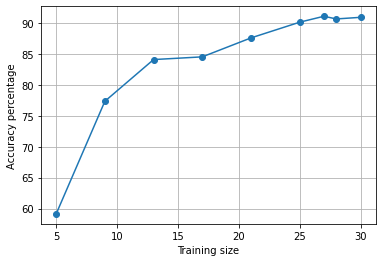

In [9]:
plt.plot(data["training_size"],data["accuracy"],'o-')
plt.xlabel("Training size")
plt.ylabel("Accuracy percentage")
plt.grid()

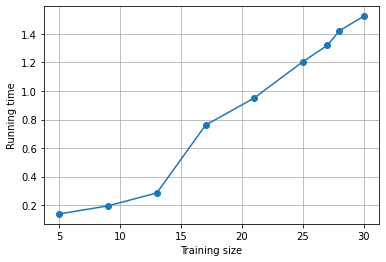

In [10]:
plt.plot(data["training_size"],data["running_time"],'o-')
plt.xlabel("Training size")
plt.ylabel("Running time")
plt.grid()

## Occluded images

## Corrupted images

In [11]:
def noisy(image):
    row,col,ch= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

In [12]:
a_corrupted = noisy(a)

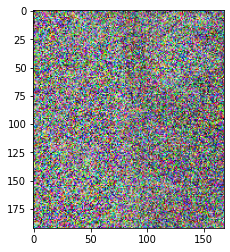

In [13]:
plt.imshow((a_corrupted*255).astype(np.uint8),cmap='gray')